# Lendo dados de arquivos:

O Pandas é um pacote excelente para a carga de dados estruturados a partir de arquivos delimitados e planilhas.

Nesse exemplo usaremos dados recentes obtidos da internet relacionados à pandemia do COVID-19 disponibilizados na pasta do Classroom. Inspecione os arquivos disponibilizados para compreende-los e seguir no caderno.

Para os exemplos a seguir é preciso seguir os seguintes passos:

- criar uma pasta de nome "dados" na raiz do seu Google Drive

- copiar o arquivo covidPorUF da pasta do Classroom dessa disciplina para essa pasta (dados retirados de https://covid19br.wcota.me/)

- "montar" o seu google drive usado o comando abaixo (ao clicar no link em azul será aberta uma nova janela onde o usuário deverá autorizar o acesso ao seu drive. Em seguida copie o link gerado e o cole no espaço aberto abaixo do link azul):

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se o procedimento foi bem sucedido será possível ver uma pasta de nome "drive" no painel à esquerda.


In [ ]:
#posicionando no diretório dados
%pwd
%cd drive
%cd My Drive
%pwd

In [ ]:
%ls

 covidporestadoedata1805.csv   covidPorUF.xlsx  '_Novas Tecnologias - Arrecadação por UF.csv'


In [ ]:
# leitura de um arquivo excel
import os
import pandas as pd
arquivo = os.path.join('dados','covidPorUF.xlsx')
covid = pd.read_excel(arquivo)
covid.head()

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          28 non-null     object 
 1   state                            28 non-null     object 
 2   totalCases                       28 non-null     int64  
 3   totalCasesMS                     28 non-null     int64  
 4   notConfirmedByMS                 28 non-null     int64  
 5   deaths                           28 non-null     int64  
 6   deathsMS                         28 non-null     int64  
 7   URL                              28 non-null     object 
 8   deaths_per_100k_inhabitants      28 non-null     float64
 9   totalCases_per_100k_inhabitants  28 non-null     int64  
 10  deaths_by_totalCases             28 non-null     float64
 11  recovered                        26 non-null     float64
 12  suspects                

In [ ]:
filtro = covid['state']!= 'TOTAL'

In [ ]:
medias = covid[filtro].mean

In [ ]:
print(medias)

<bound method NDFrame._add_numeric_operations.<locals>.mean of    country state  totalCases  totalCasesMS  notConfirmedByMS  deaths  \
1   Brazil    AC        1447          1447                 0      41   
2   Brazil    AL        2258          2258                 0     126   
3   Brazil    AM       12599         12599                 0    1004   
4   Brazil    AP        2613          2613                 0      72   
5   Brazil    BA        5774          5558               216     202   
6   Brazil    CE       16775         16692                83    1114   
7   Brazil    DF        2682          2682                 0      42   
8   Brazil    ES        4599          4599                 0     181   
9   Brazil    GO        1093          1093                 0      49   
10  Brazil    MA        8144          7599               545     399   
11  Brazil    MG        3320          3237                83     119   
12  Brazil    MS         362           362                 0      11   
1

In [ ]:
filtro2 = covid['totalCases']
covid[filtro & filtro2]

,country,state,totalCases,totalCasesMS,notConfirmedByMS,deaths,deathsMS,URL,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
1,Brazil,AC,1447,1447,0,41,41,http://saude.acre.gov.br/,4.648870e+05,16407105,0.02833,366.0,471.0,5056.0,57328488.0
3,Brazil,AM,12599,12599,0,1004,1004,http://www.amazonas.am.gov.br/,2.422431e+06,30398613,0.07969,6597.0,993.0,NaN,NaN
4,Brazil,AP,2613,2613,0,72,72,https://saude.portal.ap.gov.br/,8.513350e+05,30896349,0.02755,707.0,4942.0,10617.0,125536370.0
6,Brazil,CE,16775,16692,83,1114,1114,https://www.saude.ce.gov.br,1.219876e+06,18369313,0.06641,8463.0,28363.0,43575.0,47716412.0
8,Brazil,ES,4599,4599,0,181,181,https://saude.es.gov.br/,4.504000e+05,11444142,0.03936,1655.0,NaN,19952.0,49648514.0
9,Brazil,GO,1093,1093,0,49,47,http://www.saude.go.gov.br/,6.981700e-01,1557345,0.04483,NaN,11878.0,5073.0,7228191.0
13,Brazil,MT,519,519,0,18,18,http://www.saude.mt.gov.br/,5.165800e-01,1489468,0.03468,265.0,30.0,2819.0,8090192.0
14,Brazil,PA,7563,7256,307,672,652,http://www.saude.pa.gov.br,7.811350e+05,8791257,0.08885,4378.0,755.0,10737.0,12480726.0
15,Brazil,PB,2341,2341,0,135,135,https://paraiba.pb.gov.br/,3.359770e+05,5826098,0.05767,537.0,NaN,4867.0,12112609.0
16,Brazil,PE,13275,13275,0,1047,1047,http://www.pe.gov.br/blog/saude/,1.095524e+06,13890239,0.07887,1522.0,NaN,21380.0,22370871.0


In [ ]:
covid[filtro].sort_values(by='totalCases', ascending=False)

,country,state,totalCases,totalCasesMS,notConfirmedByMS,deaths,deathsMS,URL,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
26,Brazil,SP,46131,45444,687,3709,3709,http://www.saopaulo.sp.gov.br/,8.077260e+05,10046158,0.08040,1524.0,109207.0,35600.0,7752774.0
19,Brazil,RJ,17062,17062,0,1714,1714,http://www.rj.gov.br/,9.927630e+05,9882454,0.10046,10732.0,NaN,NaN,NaN
6,Brazil,CE,16775,16692,83,1114,1114,https://www.saude.ce.gov.br,1.219876e+06,18369313,0.06641,8463.0,28363.0,43575.0,47716412.0
16,Brazil,PE,13275,13275,0,1047,1047,http://www.pe.gov.br/blog/saude/,1.095524e+06,13890239,0.07887,1522.0,NaN,21380.0,22370871.0
3,Brazil,AM,12599,12599,0,1004,1004,http://www.amazonas.am.gov.br/,2.422431e+06,30398613,0.07969,6597.0,993.0,NaN,NaN
10,Brazil,MA,8144,7599,545,399,379,http://www.saude.ma.gov.br/,5.639430e+05,11510660,0.04899,1742.0,5024.0,16512.0,23337919.0
14,Brazil,PA,7563,7256,307,672,652,http://www.saude.pa.gov.br,7.811350e+05,8791257,0.08885,4378.0,755.0,10737.0,12480726.0
5,Brazil,BA,5774,5558,216,202,202,http://www.saude.ba.gov.br/,1.358160e+05,3882186,0.03498,1418.0,3407.0,26059.0,17520936.0
8,Brazil,ES,4599,4599,0,181,181,https://saude.es.gov.br/,4.504000e+05,11444142,0.03936,1655.0,NaN,19952.0,49648514.0
24,Brazil,SC,3429,3429,0,65,65,http://www.saude.sc.gov.br,9.072100e-01,4785906,0.01896,1469.0,207.0,22885.0,31940931.0


# Exercício 8:

Explore o dataframe criado obtendo:

- o estado com maior número de casos

- o estado com maior número de mortes

- os estados com número de casos por 100 mil habitantes acima da média nacional

- os estados com número de mortes proporcional ao número de casos abaixo da média nacional

In [ ]:
covid.loc[covid.totalCases_per_100k_inhabitants > covid.totalCases_per_100k_inhabitants.mean()].sort_values("totalCases_per_100k_inhabitants", ascending=False)

,country,state,totalCases,totalCasesMS,notConfirmedByMS,deaths,deathsMS,URL,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
4,Brazil,AP,2613,2613,0,72,72,https://saude.portal.ap.gov.br/,851335.0,30896349,0.02755,707.0,4942.0,10617.0,125536370.0
3,Brazil,AM,12599,12599,0,1004,1004,http://www.amazonas.am.gov.br/,2422431.0,30398613,0.07969,6597.0,993.0,NaN,NaN
22,Brazil,RR,1290,1290,0,21,21,https://saude.rr.gov.br/,346671.0,21295527,0.01628,271.0,60.0,1731.0,28575626.0
6,Brazil,CE,16775,16692,83,1114,1114,https://www.saude.ce.gov.br,1219876.0,18369313,0.06641,8463.0,28363.0,43575.0,47716412.0
1,Brazil,AC,1447,1447,0,41,41,http://saude.acre.gov.br/,464887.0,16407105,0.02833,366.0,471.0,5056.0,57328488.0
16,Brazil,PE,13275,13275,0,1047,1047,http://www.pe.gov.br/blog/saude/,1095524.0,13890239,0.07887,1522.0,NaN,21380.0,22370871.0
10,Brazil,MA,8144,7599,545,399,379,http://www.saude.ma.gov.br/,563943.0,11510660,0.04899,1742.0,5024.0,16512.0,23337919.0
8,Brazil,ES,4599,4599,0,181,181,https://saude.es.gov.br/,450400.0,11444142,0.03936,1655.0,NaN,19952.0,49648514.0
26,Brazil,SP,46131,45444,687,3709,3709,http://www.saopaulo.sp.gov.br/,807726.0,10046158,0.08040,1524.0,109207.0,35600.0,7752774.0
19,Brazil,RJ,17062,17062,0,1714,1714,http://www.rj.gov.br/,992763.0,9882454,0.10046,10732.0,NaN,NaN,NaN


In [ ]:
covid['razao']=covid['deaths']/covid['totalCases']

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          28 non-null     object 
 1   state                            28 non-null     object 
 2   totalCases                       28 non-null     int64  
 3   totalCasesMS                     28 non-null     int64  
 4   notConfirmedByMS                 28 non-null     int64  
 5   deaths                           28 non-null     int64  
 6   deathsMS                         28 non-null     int64  
 7   URL                              28 non-null     object 
 8   deaths_per_100k_inhabitants      28 non-null     float64
 9   totalCases_per_100k_inhabitants  28 non-null     int64  
 10  deaths_by_totalCases             28 non-null     float64
 11  recovered                        26 non-null     float64
 12  suspects                

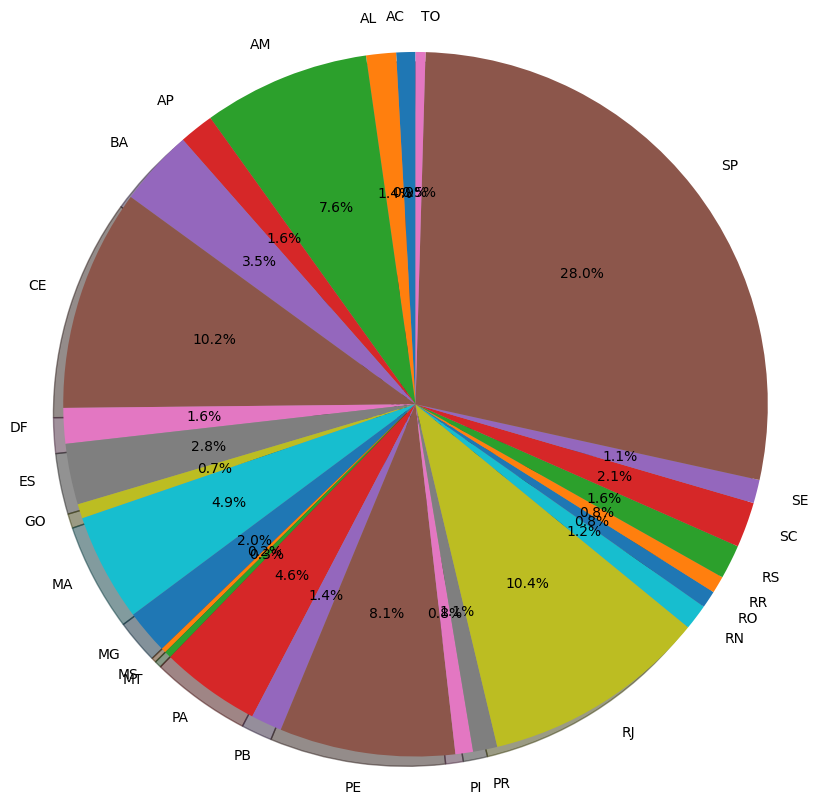

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot()
filtro = covid['state'] != 'TOTAL'
ax1.pie(covid[filtro]['totalCases'], labels=covid[filtro]['state'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
import matplotlib.pyplot as plt

del plt

In [ ]:
# leitura de um arquivo csv
arquivo2 = os.path.join('dados', 'covidporestadoedata1805.csv')
seriecovid = pd.read_csv(arquivo2)
seriecovid.head()

,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [ ]:
seriecovid[seriecovid['state'] == 'RJ'].tail(20)

,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
1348,2020-04-29,Brazil,RJ,TOTAL,56,794,365,8869,794,8869,4.59891,51.36999,0.08953,4002.0,NaN,NaN,NaN
1376,2020-04-30,Brazil,RJ,TOTAL,60,854,584,9453,854,9453,4.94644,54.75257,0.09034,5032.0,NaN,NaN,NaN
1404,2020-05-01,Brazil,RJ,TOTAL,67,921,713,10166,921,10166,5.33451,58.88233,0.09060,5711.0,NaN,NaN,NaN
1432,2020-05-02,Brazil,RJ,TOTAL,50,971,380,10546,971,10546,5.62411,61.08332,0.09207,6115.0,NaN,NaN,NaN
1460,2020-05-03,Brazil,RJ,TOTAL,48,1019,593,11139,1019,11139,5.90213,64.51802,0.09148,6284.0,NaN,NaN,NaN
1488,2020-05-04,Brazil,RJ,TOTAL,46,1065,582,11721,1065,11721,6.16857,67.88902,0.09086,6284.0,NaN,NaN,NaN
1516,2020-05-05,Brazil,RJ,TOTAL,58,1123,670,12391,1123,12391,6.50451,71.76971,0.09063,7260.0,NaN,NaN,NaN
1544,2020-05-06,Brazil,RJ,TOTAL,82,1205,904,13295,1205,13295,6.97946,77.00576,0.09064,8300.0,NaN,NaN,NaN
1572,2020-05-07,Brazil,RJ,TOTAL,189,1394,861,14156,1394,14156,8.07417,81.99274,0.09847,8968.0,NaN,NaN,NaN
1600,2020-05-08,Brazil,RJ,TOTAL,109,1503,1585,15741,1503,15741,8.70550,91.17319,0.09548,8968.0,NaN,NaN,NaN


In [ ]:
seriecovid.describe()

,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
count,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1219.000000,1194.000000,569.000000,569.000000
mean,17.730159,284.140741,269.247619,4275.547090,280.852910,4214.252910,1.590397,31.931110,0.035476,1680.997539,15205.973199,25102.305800,282.824856
std,70.815758,1250.269856,1075.503053,18055.091959,1237.525797,17814.412493,3.481988,59.810773,0.032074,6745.167731,42980.165511,62991.551179,356.714854
min,-1.000000,0.000000,-290.000000,1.000000,0.000000,0.000000,0.000000,0.000480,0.000000,1.000000,1.000000,854.000000,36.761660
25%,0.000000,1.000000,4.000000,44.000000,1.000000,42.000000,0.009702,1.091730,0.006817,28.000000,183.000000,3904.000000,92.639730
50%,1.000000,14.000000,31.000000,421.000000,14.000000,407.500000,0.315690,7.747035,0.031950,187.000000,621.000000,8402.000000,165.681920
75%,5.000000,73.750000,130.000000,1929.750000,72.000000,1867.000000,1.283185,34.541915,0.054080,992.500000,4471.000000,19757.000000,298.760040
max,913.000000,16755.000000,15461.000000,254439.000000,16118.000000,241080.000000,34.575130,504.584640,0.222220,93391.000000,322937.000000,466209.000000,2210.218130


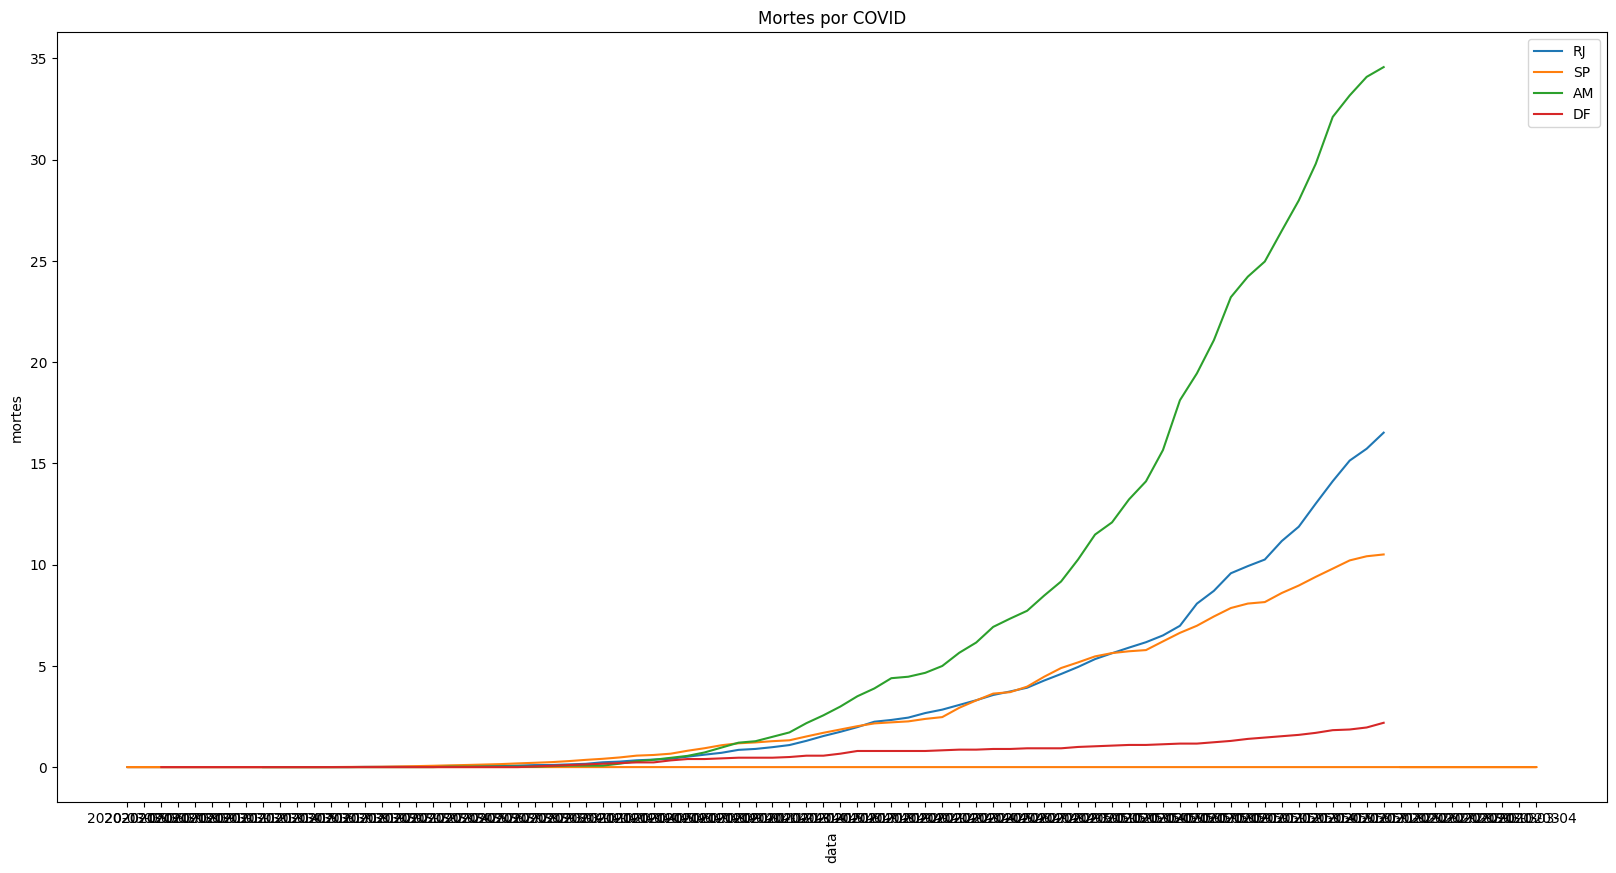

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
filtroRJ = seriecovid['state'] == 'RJ'
filtroSP = seriecovid['state'] == 'SP'
filtroAM = seriecovid['state'] == 'AM'
filtroDF = seriecovid['state'] == 'DF'
plt.plot(seriecovid[filtroRJ]['date'],seriecovid[filtroRJ]['deaths_per_100k_inhabitants'])
plt.plot(seriecovid[filtroSP]['date'],seriecovid[filtroSP]['deaths_per_100k_inhabitants'])
plt.plot(seriecovid[filtroAM]['date'],seriecovid[filtroAM]['deaths_per_100k_inhabitants'])
plt.plot(seriecovid[filtroDF]['date'],seriecovid[filtroDF]['deaths_per_100k_inhabitants'])
plt.xlabel('data',rotation=90)
plt.ylabel('mortes')
plt.legend(['RJ', 'SP','AM','DF'])
plt.title('Mortes por COVID')
plt.show()

## Group by

Permite a agregação de dados em segmentos.

In [ ]:
seriecovid.groupby('state')['totalCases_per_100k_inhabitants'].max()

state
AC       253.30665
AL       120.78420
AM       504.58464
AP       475.68317
BA        59.71197
CE       288.68566
DF       153.15388
ES       178.09463
GO        25.37632
MA       187.10475
MG        22.17888
MS        22.05841
MT        27.00557
PA       179.78894
PB       108.18473
PE       210.25270
PI        69.86989
PR        20.64027
RJ       154.44592
RN        89.45342
RO       110.45309
RR       309.69310
RS        32.82870
SC        72.22824
SE       145.43028
SP       137.21103
TO        95.11300
TOTAL    121.07660
Name: totalCases_per_100k_inhabitants, dtype: float64

# Exercício 9

Encontre um arquivo de dados na internet, formato excel ou csv, faça a importação para um dataframe e sua análise preliminar.

In [ ]:
import pandas as pd
import os

arquivo = os.path.join('dados' ,'_Novas Tecnologias - Arrecadação por UF.csv')
dados = pd.read_csv(arquivo)

colunas_numericas = [
    'IMPOSTO SOBRE IMPORTAÇÃO', 'IMPOSTO SOBRE EXPORTAÇÃO', 'IPI - FUMO',
    'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS', 'IPI - VINCULADO À IMPORTACAO',
    'IPI - OUTROS', 'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS',
    'IRPJ - DEMAIS EMPRESAS', 'IRRF - RENDIMENTOS DO TRABALHO',
    'IRRF - RENDIMENTOS DO CAPITAL', 'IRRF - REMESSAS P/ EXTERIOR',
    'IRRF - OUTROS RENDIMENTOS', 'IMPOSTO S/ OPERAÇÕES FINANCEIRAS',
    'IMPOSTO TERRITORIAL RURAL', 'CPMF', 'COFINS'
]

for coluna in colunas_numericas:
    # Remover pontos e substituir vírgulas por pontos
    dados[coluna] = pd.to_numeric(dados[coluna].str.replace('.', '', regex=False).str.replace(',', '.', regex=False), errors='coerce')


In [ ]:
dados.head()

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,...,IRPJ - ENTIDADES FINANCEIRAS,IRPJ - DEMAIS EMPRESAS,IRRF - RENDIMENTOS DO TRABALHO,IRRF - RENDIMENTOS DO CAPITAL,IRRF - REMESSAS P/ EXTERIOR,IRRF - OUTROS RENDIMENTOS,IMPOSTO S/ OPERAÇÕES FINANCEIRAS,IMPOSTO TERRITORIAL RURAL,CPMF,COFINS
0,2000,Janeiro,AC,231.0,0.0,292096.0,0.0,0.0,167.0,1558.0,...,643.0,676835.0,1084940.0,27652.0,570.0,30894.0,1220.0,28447.0,103.0,1770475.0
1,2000,Janeiro,AL,475088.0,33873.0,1329338.0,812470.0,0.0,141735.0,3676847.0,...,561.0,2672106.0,4454947.0,544056.0,191382.0,309573.0,26939.0,4252539.0,97248.0,7493570.0
2,2000,Janeiro,AM,11679405.0,0.0,1507146.0,1791471.0,27796.0,4414483.0,1800346.0,...,90828.0,10058713.0,10174718.0,1241708.0,3580022.0,1029164.0,843881.0,40171.0,832562.0,44000981.0
3,2000,Janeiro,AP,24267.0,0.0,424862.0,1419.0,321.0,22333.0,12165.0,...,44135.0,586572.0,1444486.0,205031.0,5825.0,34602.0,6999.0,6477.0,0.0,1682102.0
4,2000,Janeiro,BA,10476457.0,13.0,5542123.0,11533707.0,0.0,7496476.0,23743858.0,...,177378.0,25695696.0,27277025.0,13374802.0,2302766.0,2022200.0,1218485.0,2446535.0,11923442.0,81027229.0


In [ ]:
# Verificar se a conversão foi realizada corretamente
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ano                               7857 non-null   int64  
 1   Mês                               7857 non-null   object 
 2   UF                                7857 non-null   object 
 3   IMPOSTO SOBRE IMPORTAÇÃO          7576 non-null   float64
 4   IMPOSTO SOBRE EXPORTAÇÃO          7812 non-null   float64
 5   IPI - FUMO                        7565 non-null   float64
 6   IPI - BEBIDAS                     7565 non-null   float64
 7   IPI - AUTOMÓVEIS                  7742 non-null   float64
 8   IPI - VINCULADO À IMPORTACAO      7618 non-null   float64
 9   IPI - OUTROS                      7596 non-null   float64
 10  IRPF                              7553 non-null   float64
 11  IRPJ - ENTIDADES FINANCEIRAS      7710 non-null   float64
 12  IRPJ -

In [ ]:
dados.describe()

,Ano,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,IRPF,IRPJ - ENTIDADES FINANCEIRAS,IRPJ - DEMAIS EMPRESAS,IRRF - RENDIMENTOS DO TRABALHO,IRRF - RENDIMENTOS DO CAPITAL,IRRF - REMESSAS P/ EXTERIOR,IRRF - OUTROS RENDIMENTOS,IMPOSTO S/ OPERAÇÕES FINANCEIRAS,IMPOSTO TERRITORIAL RURAL,CPMF,COFINS
count,7857.000000,7.576000e+03,7.812000e+03,7.565000e+03,7.565000e+03,7.742000e+03,7.618000e+03,7.596000e+03,7.553000e+03,7.710000e+03,7.476000e+03,7.482000e+03,7.641000e+03,7.674000e+03,7.640000e+03,7.695000e+03,7.796000e+03,7.619000e+03,7.405000e+03
mean,2011.628866,8.843170e+07,6.410363e+05,1.231726e+07,7.692383e+06,1.140088e+07,4.120797e+07,5.724626e+07,7.668695e+07,4.816696e+07,3.261268e+08,2.567637e+08,1.247459e+08,6.241393e+07,2.635833e+07,7.904617e+07,3.093999e+06,2.216815e+07,1.387076e+07
std,7.001653,2.602518e+08,2.171724e+07,5.284756e+07,1.416290e+07,3.425511e+07,1.049299e+08,1.638917e+08,2.257140e+08,2.313112e+08,1.041055e+09,6.953243e+08,5.637184e+08,2.987107e+08,8.146630e+07,3.376787e+08,1.594648e+07,1.537094e+08,1.063520e+08
min,2000.000000,-5.915950e+05,-3.379762e+06,-4.329186e+07,-1.079723e+07,-5.424603e+06,0.000000e+00,-3.485777e+06,1.036410e+02,-8.099953e+06,3.037600e+02,-7.471250e+07,-1.872138e+08,-2.590460e+08,-2.555620e+06,-2.689010e+05,-1.775623e+07,-3.496452e+06,0.000000e+00
25%,2006.000000,1.455566e+05,0.000000e+00,0.000000e+00,3.581455e+05,0.000000e+00,9.084081e+04,1.293855e+06,4.329092e+06,3.170477e+03,1.226223e+07,1.105071e+07,6.550850e+05,1.094368e+05,7.573428e+05,1.799975e+05,7.161761e+04,0.000000e+00,0.000000e+00
50%,2012.000000,4.568057e+06,3.243250e+02,2.012356e+04,2.732534e+06,2.374140e+03,1.768570e+06,4.220059e+06,1.560704e+07,2.349612e+05,4.692312e+07,3.634489e+07,3.405593e+06,1.438582e+06,2.841787e+06,1.802837e+06,2.655685e+05,0.000000e+00,0.000000e+00
75%,2018.000000,6.108894e+07,8.588267e+03,1.744235e+06,8.547034e+06,6.533904e+05,3.334958e+07,4.223042e+07,5.183784e+07,8.159727e+06,1.986015e+08,1.275928e+08,2.273274e+07,1.189903e+07,1.126595e+07,1.164796e+07,1.086750e+06,1.137684e+05,0.000000e+00
max,2024.000000,2.795288e+09,1.206944e+09,8.944776e+08,1.456451e+08,3.476686e+08,1.152147e+09,1.666053e+09,5.299245e+09,7.729619e+09,2.293867e+10,9.756350e+09,1.446338e+10,6.713613e+09,9.338009e+08,3.763449e+09,3.751499e+08,2.332493e+09,2.299033e+09


In [ ]:
medias = dados[colunas_numericas].mean()

medias_formatadas = medias.apply(lambda x: f'{x:,.2f}')
print(medias_formatadas)

IMPOSTO SOBRE IMPORTAÇÃO             88,431,698.99
IMPOSTO SOBRE EXPORTAÇÃO                641,036.35
IPI - FUMO                           12,317,263.74
IPI - BEBIDAS                         7,692,382.60
IPI - AUTOMÓVEIS                     11,400,880.97
IPI - VINCULADO À IMPORTACAO         41,207,966.38
IPI - OUTROS                         57,246,258.26
IRPF                                 76,686,947.77
IRPJ - ENTIDADES FINANCEIRAS         48,166,957.29
IRPJ - DEMAIS EMPRESAS              326,126,844.77
IRRF - RENDIMENTOS DO TRABALHO      256,763,683.69
IRRF - RENDIMENTOS DO CAPITAL       124,745,939.73
IRRF - REMESSAS P/ EXTERIOR          62,413,931.62
IRRF - OUTROS RENDIMENTOS            26,358,334.21
IMPOSTO S/ OPERAÇÕES FINANCEIRAS     79,046,169.13
IMPOSTO TERRITORIAL RURAL             3,093,999.05
CPMF                                 22,168,145.57
COFINS                               13,870,757.46
dtype: object
